In [54]:
suppressPackageStartupMessages({
  library(Seurat)
  library(dplyr)
  library(ggplot2)
  library(clusterProfiler)
    library(enrichplot)
library(ggplot2)
    library(scCustomize)
})

In [12]:
artem.obj = readRDS(
    glue::glue(
        'seurat_objects/Kamenova_et_al_mouse.rds'
    )
)

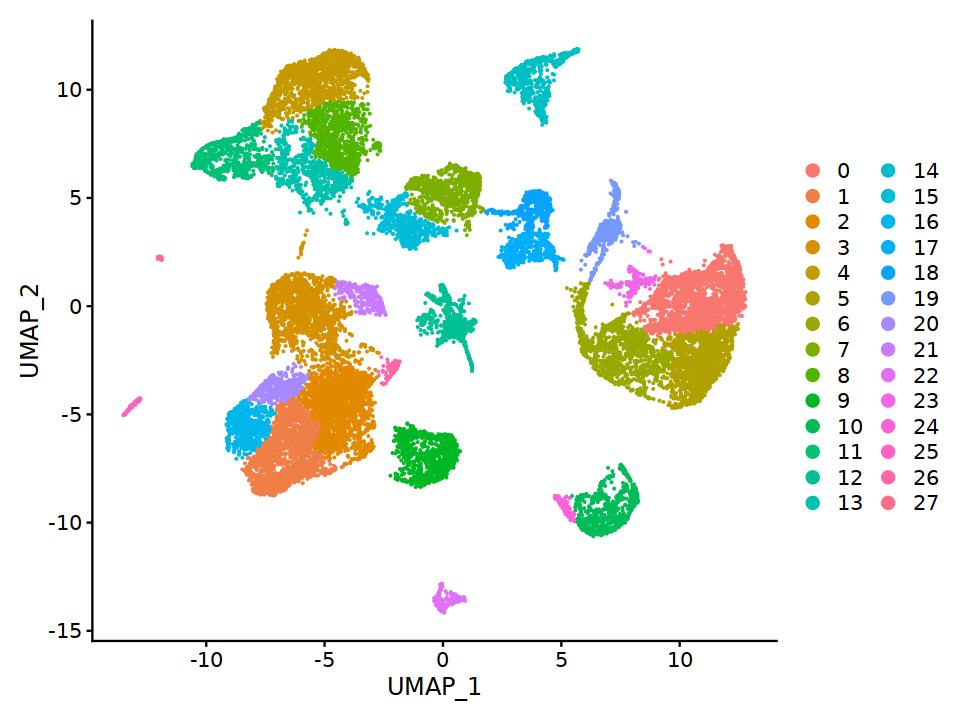

In [13]:
options(repr.plot.height=6, repr.plot.width=8, res=150 ) 
DimPlot(artem.obj, reduction = "umap")

In [14]:
artem.obj = UpdateSeuratObject(artem.obj)

Validating object structure

Updating object slots

Ensuring keys are in the proper structure

Warning message:
“Assay RNA changing from Assay to Assay”
Warning message:
“DimReduc pca changing from DimReduc to DimReduc”
Warning message:
“DimReduc umap changing from DimReduc to DimReduc”
Ensuring keys are in the proper structure

Ensuring feature names don't have underscores or pipes

Updating slots in RNA

Updating slots in RNA_nn

Setting default assay of RNA_nn to RNA

Updating slots in RNA_snn

Setting default assay of RNA_snn to RNA

Updating slots in pca

Updating slots in umap

Setting umap DimReduc to global

Setting assay used for NormalizeData.RNA to RNA

Setting assay used for FindVariableFeatures.RNA to RNA

Setting assay used for ScaleData.RNA to RNA

Setting assay used for RunPCA.RNA to RNA

Setting assay used for JackStraw.RNA.pca to RNA

No assay information could be found for ScoreJackStraw

Warning message:
“Adding a command log without an assay associated with it”
Set

In [20]:
selected_cells =
    artem.obj@meta.data %>% dplyr::filter((!!sym('RNA_snn_res.0.3')) %in% c(17, 18)) %>% 
    rownames

In [21]:
artem.obj

An object of class Seurat 
19330 features across 22715 samples within 1 assay 
Active assay: RNA (19330 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

In [22]:
selected_cells %>% length

[1] 1051

In [23]:
artem.obj.tumor = artem.obj[,selected_cells]

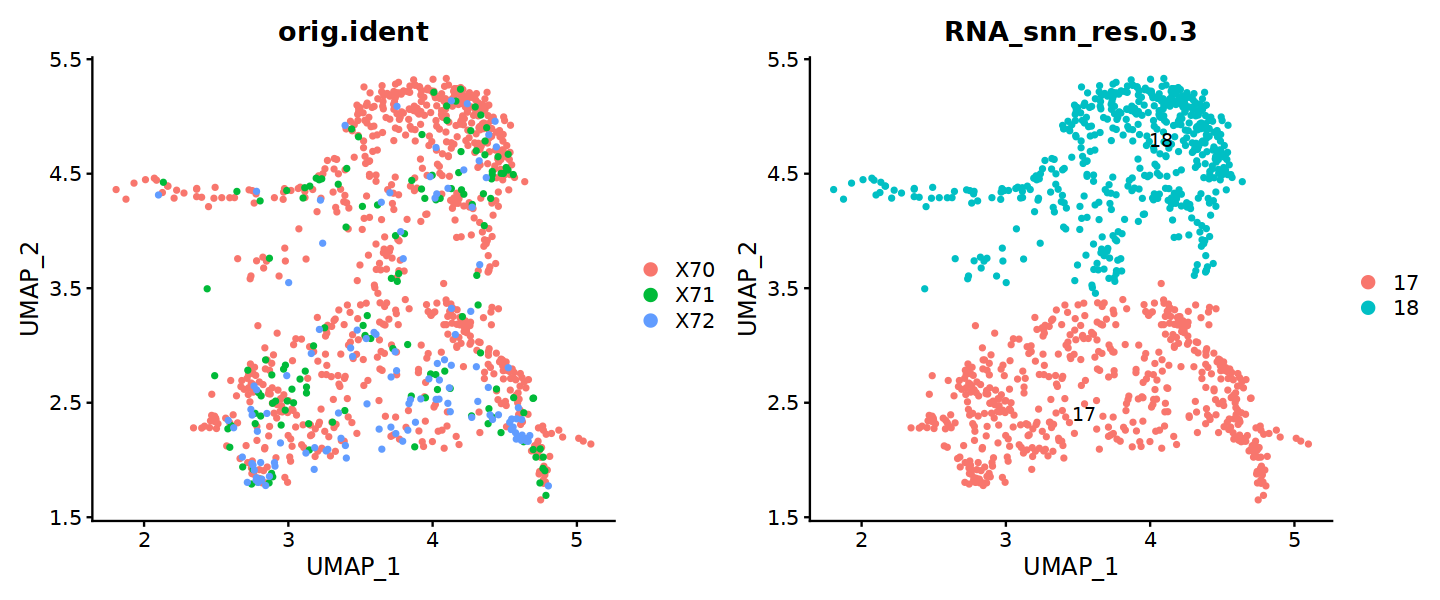

In [24]:
options(repr.plot.height=5, repr.plot.width=12, res=150 ) 
p1 <- DimPlot(artem.obj.tumor, reduction = "umap",group.by='orig.ident') 
p2 <- DimPlot(artem.obj.tumor, 
              group.by = 'RNA_snn_res.0.3',
              reduction = "umap", label = TRUE, repel = TRUE)
p3 = p1 + p2
p3

In [25]:
custom.annot = c('Sympathoblasts', 'Chromaffin Cells')
names(custom.annot) = c('17','18')

In [26]:
artem.obj.tumor@meta.data$annot = custom.annot[ 
    artem.obj.tumor@meta.data$seurat_clusters %>% as.vector ]

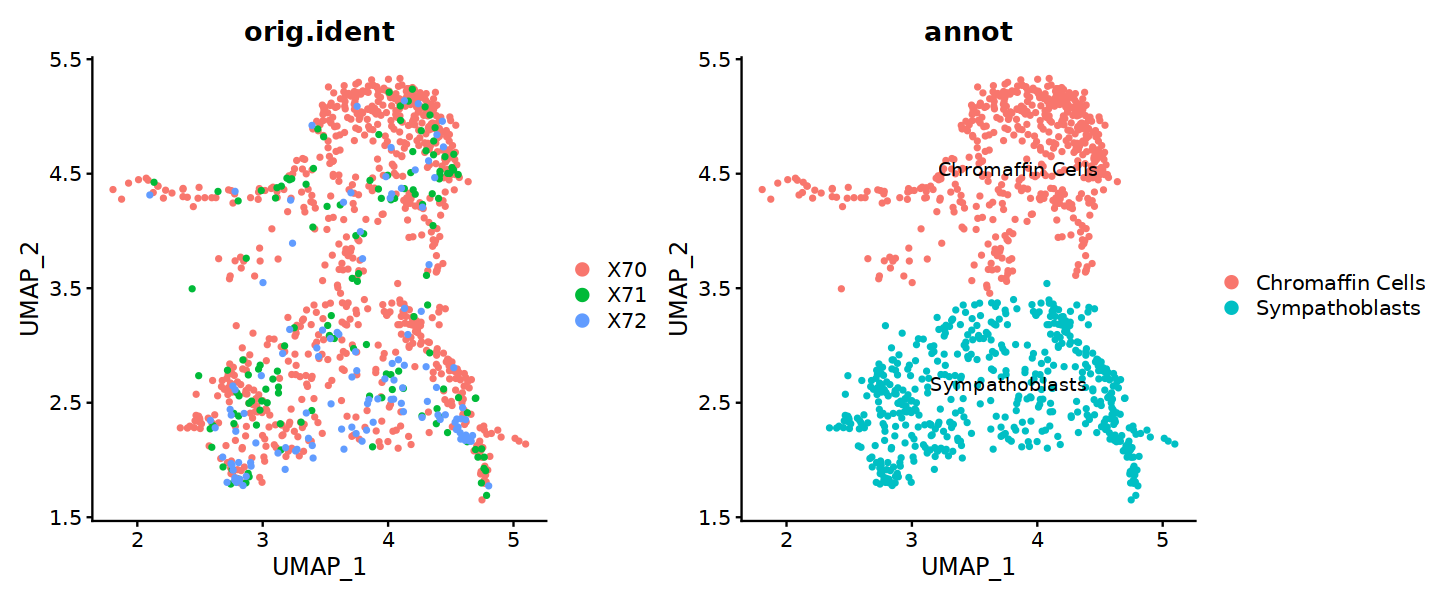

In [27]:
p1 <- DimPlot(artem.obj.tumor, reduction = "umap",group.by='orig.ident') 
p2 <- DimPlot(artem.obj.tumor, 
              group.by = 'annot',
              reduction = "umap", label = TRUE, repel = TRUE)
p1 + p2

In [28]:
adr.obj.subset = readRDS(
    '~/Downloads/Embie_et_al_datasets/seurat_objects/adrenal_subset.rds'

)

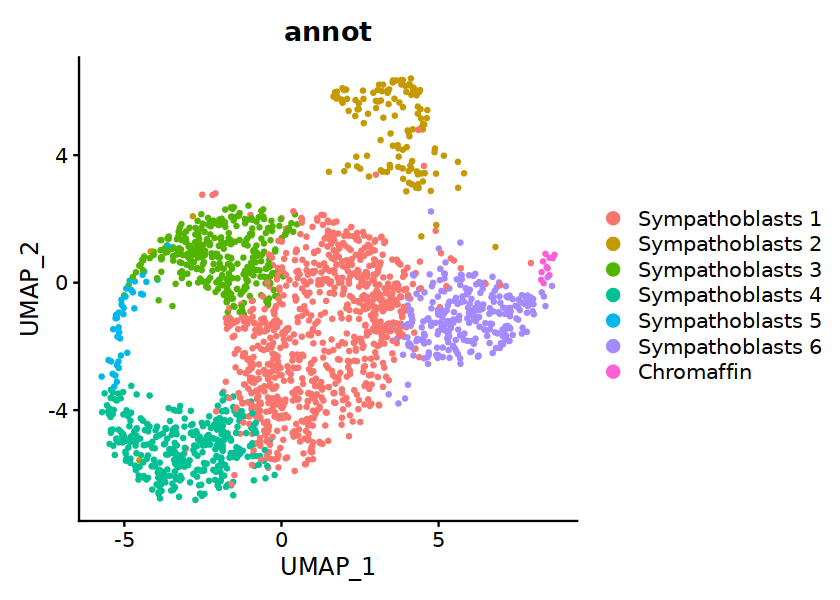

In [30]:
options(repr.plot.height=5, repr.plot.width=7, res=150 ) 
cell.names =  sample(adr.obj.subset@meta.data %>% rownames,
       2000)
adr.obj.sample = adr.obj.subset[,cell.names]
DimPlot(adr.obj.sample, reduction = "umap",group.by='annot')

In [32]:
'MYCN' %in% rownames(adr.obj.sample)

[1] TRUE

In [33]:
adr.obj.sample

An object of class Seurat 
31280 features across 2000 samples within 1 assay 
Active assay: RNA (31280 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

In [31]:
adr.obj.removed = adr.obj.sample[setdiff(rownames(adr.obj.sample), 'MYCN'),]

Warning message:
“Not all features provided are in this Assay object, removing the following feature(s): MYCN”


In [34]:
'MYCN' %in% rownames(adr.obj.removed)

[1] FALSE

In [36]:
artem.list = SplitObject(artem.obj.tumor,split.by = "orig.ident")
adr.list =  SplitObject(adr.obj.removed, split.by = "orig.ident")

In [39]:
combined.list = c(artem.list, adr.list)

In [40]:
features = SelectIntegrationFeatures(
    combined.list
)
s.obj.scaled = lapply(
    X = combined.list,
    FUN = function(x){
        x = ScaleData(x, features = features, verbose = FALSE)
        x = RunPCA(x, features = features, verbose = FALSE)
    }
)

anchors = FindIntegrationAnchors(
    object.list = s.obj.scaled,
    dims = 1:50,
    
)

combined = IntegrateData(
    anchorset = anchors,
    dims = 1:50
)

Warning message:
“Number of dimensions changing from 30 to 50”
Warning message:
“Number of dimensions changing from 30 to 50”
Warning message:
“Number of dimensions changing from 30 to 50”
Warning message:
“Number of dimensions changing from 30 to 50”
Warning message:
“Number of dimensions changing from 30 to 50”
Computing 2000 integration features

Scaling features for provided objects

Finding all pairwise anchors

Warning message:
“`invoke()` is deprecated as of rlang 0.4.0.
Please use `exec()` or `inject()` instead.
This warning is displayed once every 8 hours.”
Warning message:
“Different cells and/or features from existing assay RNA”
Warning message:
“Different cells and/or features from existing assay RNA”
Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 689 anchors

Filtering anchors

Warning message in FilterAnchors(object = object.pair, assay = assay, slot = slot, :
“Number of anchor cells is less than k.filter. Retaining all anchors.”
Warning mess

In [41]:
combined <- ScaleData(combined, verbose = FALSE)
combined <- RunPCA(combined, npcs = 30, verbose = FALSE)
combined <- RunUMAP(combined, reduction = "pca", dims = 1:30)
combined <- FindNeighbors(combined, reduction = "pca", dims = 1:30)
combined <- FindClusters(combined, resolution = 0.5)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
14:16:23 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

14:16:23 Read 3051 rows and found 30 numeric columns

14:16:23 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

14:16:23 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:16:23 Writing NN index file to t

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3051
Number of edges: 140171

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8098
Number of communities: 8
Elapsed time: 0 seconds


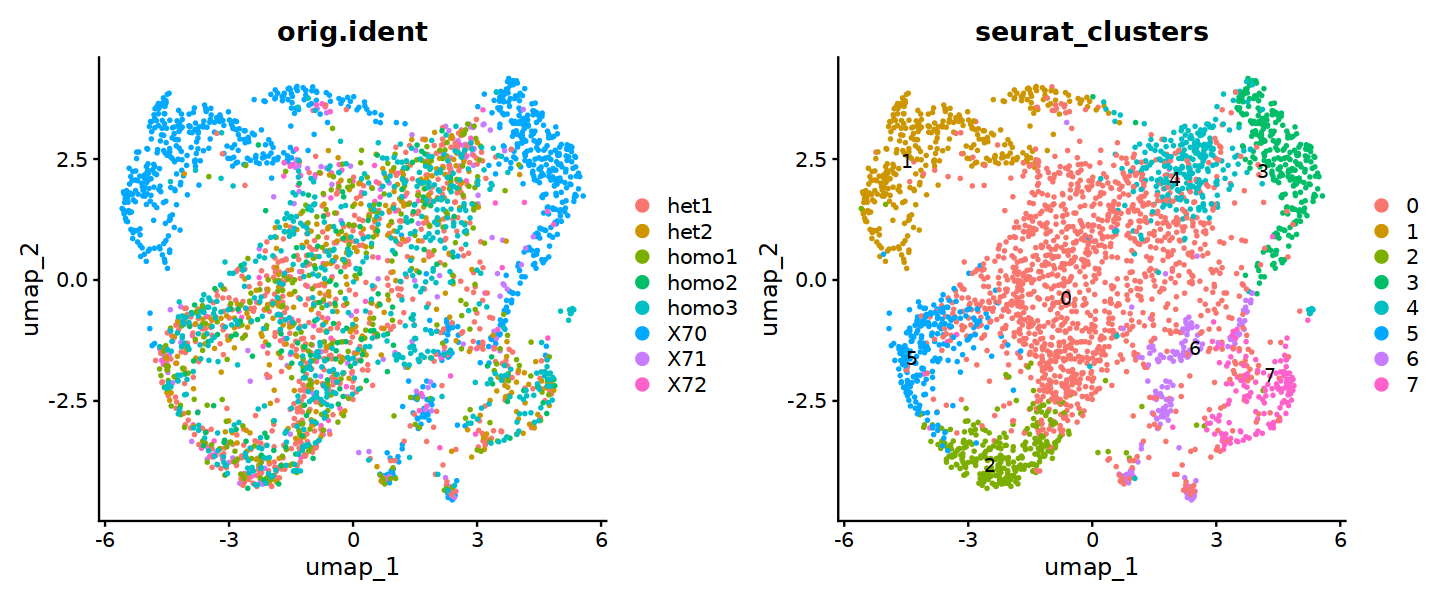

In [42]:
options(repr.plot.height=5, repr.plot.width=12, res=150 ) 
p1 <- DimPlot(combined, reduction = "umap",group.by='orig.ident')
p2 <- DimPlot(combined, 
              group.by = 'seurat_clusters',
              reduction = "umap", label = TRUE, repel = TRUE)
p1 + p2

In [43]:
mito.genes = grep(pattern = "^mt-", x = rownames(combined@assays$RNA), 
                  value = TRUE, ignore.case = TRUE)
rpl.genes = grep(pattern = "^rpl", x = rownames(combined@assays$RNA), 
                 value = TRUE, ignore.case = TRUE)
rps.genes = grep(pattern = "^rps", x = rownames(combined@assays$RNA), 
                 value = TRUE, ignore.case = TRUE)
genes.removed = union(mito.genes, rpl.genes)
genes.removed = union(genes.removed, rps.genes) 
combined.remove = combined[setdiff(rownames(combined@assays$RNA), genes.removed),]

In [44]:
combined.remove$sample.type = combined.remove$orig.ident
combined.remove$sample.type[grep('X', combined.remove$orig.ident)] = 'adrenal'
combined.remove$sample.type[!grepl('X', combined.remove$orig.ident)] = 'neuroblastoma'
combined.remove$sample.type = as.factor(combined.remove$sample.type)

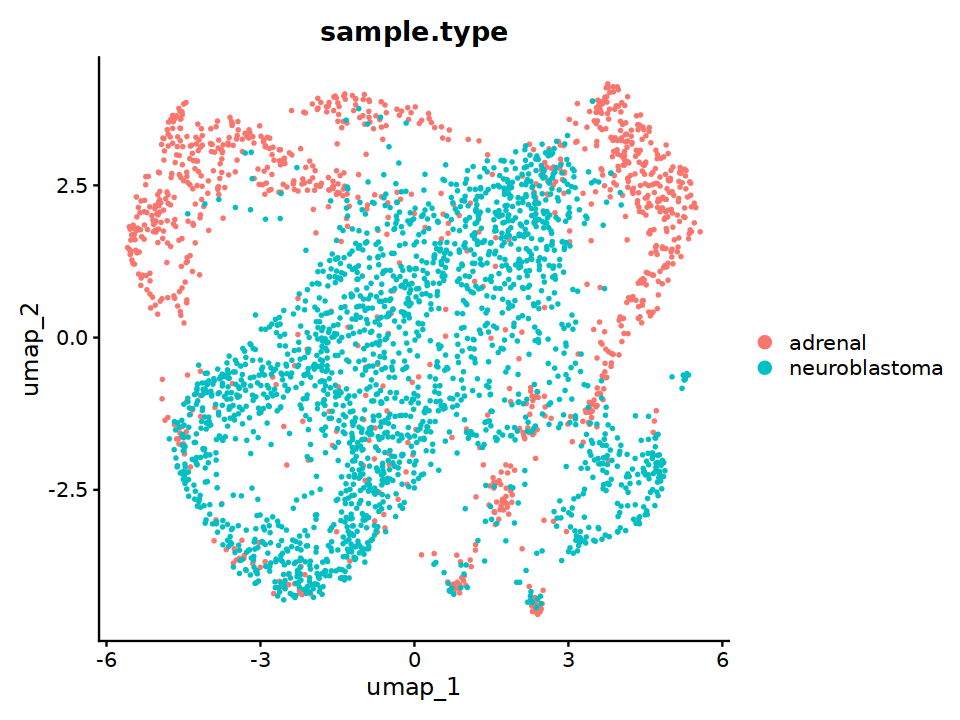

In [45]:
options(repr.plot.height=6, repr.plot.width=8, res=150 ) 
DimPlot(combined.remove, reduction = "umap",group.by='sample.type')

In [46]:
Idents(combined.remove) = "sample.type"

In [47]:
markers = FindAllMarkers(combined.remove, only.pos = T)

Calculating cluster adrenal

Calculating cluster neuroblastoma



In [48]:
markers %>%
    group_by(cluster) %>%
    top_n(n = 20, wt = avg_log2FC) -> top20

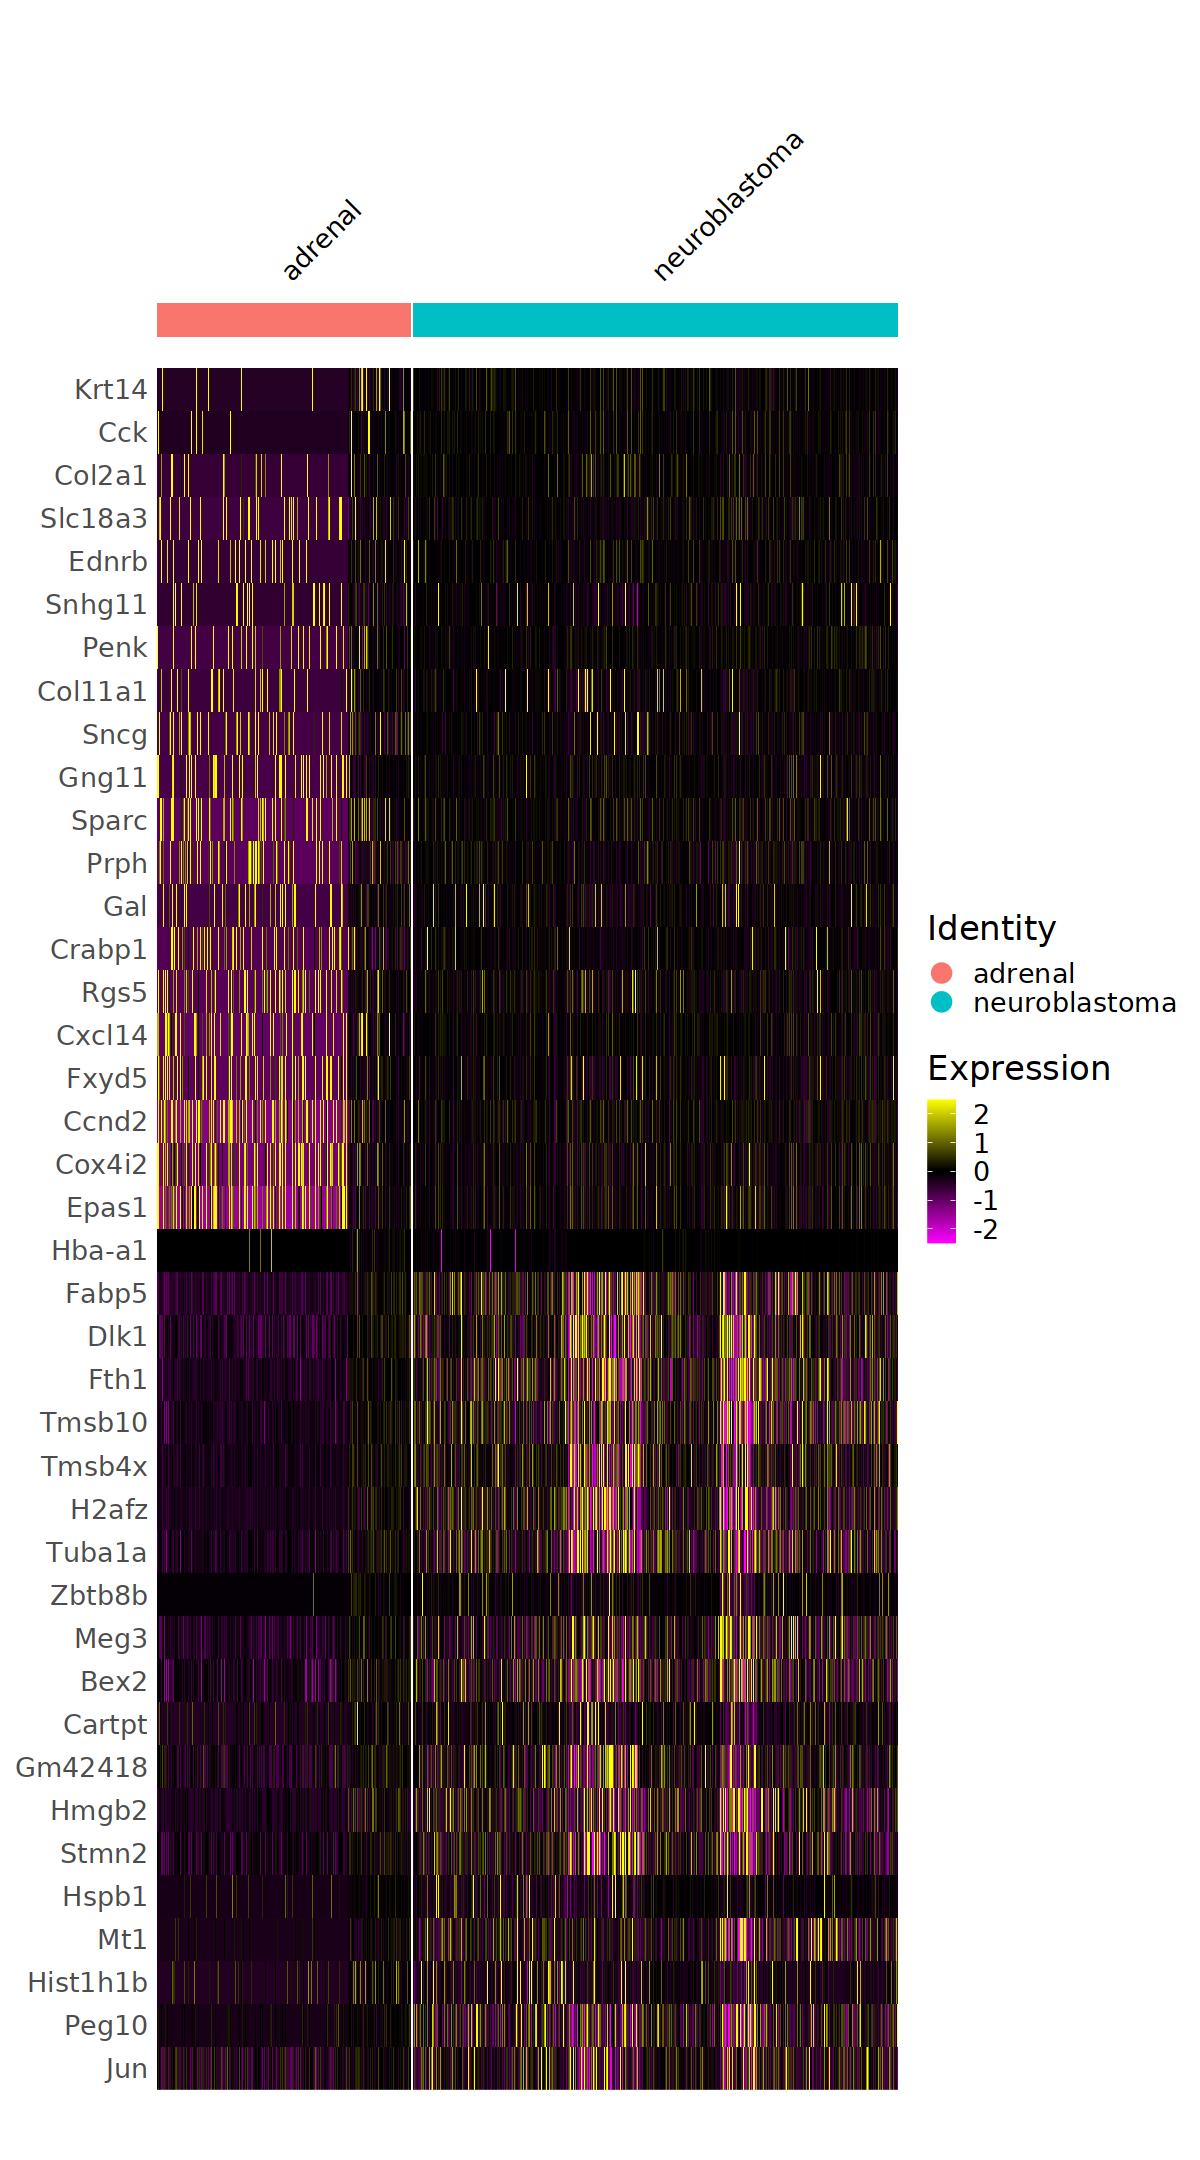

In [55]:
options(repr.plot.height=18, repr.plot.width=10, res=150 ) 
p1 = DoHeatmap(combined.remove, features = top20$gene) +  
guides(colour = guide_legend(override.aes = list(alpha = 1, size = 5))) +
theme(text = element_text(size = 20))
p1 